In [1]:
import numpy as np 
from qclab.algorithms.mean_field import MeanField
from qclab.models.holstein_lattice import HolsteinLatticeModel
from qclab.simulation import Simulation
from qclab.drivers.serial_driver import run_simulation


# simulation parameters 
simulation_parameters = dict(dt = 0.01, tmax = 100, num_trajs = 2, batch_size = 2)
sim = Simulation(simulation_parameters)
model_parameters = dict(N = 10, j = 1.0,w = 1.0, g = .01, periodic_boundary = True)
sim.model = HolsteinLatticeModel(model_parameters)
sim.algorithm = MeanField()


wf_db_0 = np.zeros(sim.model.parameters.N) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.add('wf_db', wf_db_0)

data = run_simulation(sim)


TypeError: 'State' object is not iterable

1


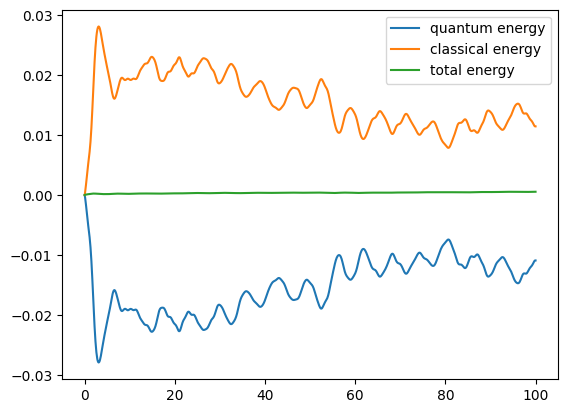

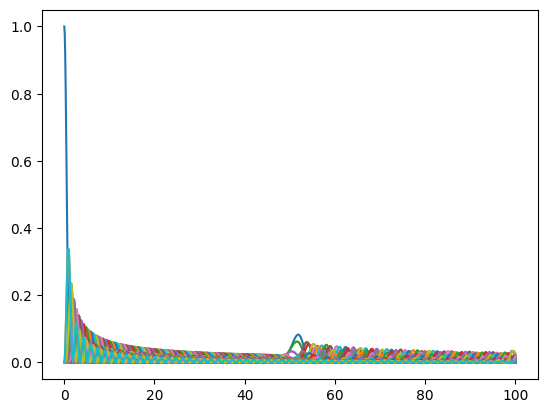

In [ ]:
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = data.data_dic['quantum_energy']/ntraj
ec = data.data_dic['classical_energy']/ntraj
pops = np.einsum('tii->ti', data.data_dic['dm_db']/ntraj)

import matplotlib.pyplot as plt
plt.plot(sim.parameters.tdat_output, eq-eq[0], label='quantum energy')
plt.plot(sim.parameters.tdat_output,ec-ec[0], label='classical energy') 
plt.plot(sim.parameters.tdat_output,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(sim.parameters.tdat_output,pops)
plt.show()

In [ ]:
print(np.shape(sim.parameters.tdat))

(10001,)
